# Tugas Praktikum Minggu 3
### Nicholas Juan Kalvin P. | 162012133068
<hr>



# Image Mining

## Tugas Praktikum:
<ol>
    <li> Memodifikasi kode bagian (a) agar dapat menampilkan citra "Lenna" dalam grayscale</li>
    <li> Memodifikasi kode bagian (a) agar bisa melakukkan crop pada citra "Lenna"
    <li> Memodifikasi kode bagian (a) agar dapat menampilkan ukuran citra grayscale dar "Lenna" dan nilai matriks dari citra grayscale pada baris ke-0 dan kolom ke-0.
         Apakah hasilnya beda dari kode bagian (b)? Jelaskan alasannya!</li>
     <li> Modifikasi kode bagian (c) untuk menampilkan Green and Red</li>
     <li> Simpanlah file "Lenna" menjadi format JPEG dengan menggunakan method <code>imwrite</code> pada OpenCV. Apakah terdapat perbedaan nilai array pada file citra asli dan file dengan format JPEG? Jelaskan alasannya!
</ol>

<hr>


In [3]:
# Modules
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

### Tugas Praktikum No. A 1

In [25]:
# Load image
normal_image = cv2.imread('./lenna.png')
grey_image = cv2.cvtColor(normal_image, cv2.COLOR_BGR2GRAY)
cv2.imshow('Greyscaled Image', grey_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Tugas Praktikum No. A 2

In [28]:
# Mencari dimensi
height = normal_image.shape[0]
width = normal_image.shape[1]
channels = normal_image.shape[2]

print('Height: ', height)
print('Width: ', width)
print('Channels: ', channels)

# Croppping
cropped_image = normal_image[150:280, 150:280]
cv2.imshow('Cropped Image', cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Height:  330
Width:  330
Channels:  3


### Tugas Praktikum No. A 3

In [27]:
print('Ukuran citra greyscale: ', grey_image.shape)
print('Matriks warna (0, 0) greyscale:  ', grey_image[0, 0], '\n')

print('Ukuran citra warna: ', normal_image.shape)
print('Matriks warna (0, 0) greyscale:  ', normal_image[0, 0])


Ukuran citra greyscale:  (330, 330)
Matriks warna (0, 0) greyscale:   162 

Ukuran citra warna:  (330, 330, 3)
Matriks warna (0, 0) greyscale:   [124 137 226]


### Penjelasan:
<p> Perbedaan pada nilai ukuran citra dan matriks warna terdapat dijelaskan oleh warna citra itu sendiri.
Pada ukuran citra greyscale, hanya terdapat 2 nilai karena nilai 3 yang berisi <code>channel</code> tidak tersedia karena hanya memiliki satu spektrum warna.</p><br>
<p>Matriks pada citra greyscale juga hanya berjumlah satu, karena satu nilai itu yang menjelaskan seberapa "dalam" warna hitam yang dibuat</p><br>
<p>Sedangkan untuk citra yang memiliki warna, terdapat nilai channel bernilai 3 yaitu channel <code>Red, Green dan Blue</code> yang membuat citra memiliki warna.</p><br>
<p>Matriks pada citra bewarna juga berbeda, karena matriks ini memiliki 3 nilai, yaitu <code>Red, Green dan Blue</code> dimana masing nilai menjelaskan seberapa "dalam" warna tersebut</p>

### Tugas Praktikum No. A 4

In [5]:
# Lihat Channel Warna
(blue, green, red) = cv2.split(normal_image)
print('Channel Biru: ', blue)
print('Channel Hijau: ', green)
print('Channel Merah: ', red)

def single_colorizer(image, color):
    splitted_image = cv2.split(image)
    m = np.zeros(splitted_image[0].shape[:2], splitted_image[0].dtype)
    colored_image = None
    if color == 'red':
        colored_image = cv2.merge([m, m, splitted_image[0]])
    elif color == 'green':
        colored_image = cv2.merge([m, splitted_image[0], m])
    elif color == 'blue':
        colored_image = cv2.merge([splitted_image[0], m, m])
    else:
        print('Error!')

    return colored_image

# cv2.imshow('biru', single_colorizer(blue, 2))
red = single_colorizer(normal_image, 'red')
green = single_colorizer(normal_image, 'green')
blue = single_colorizer(normal_image, 'blue')

vertical_concat = np.concatenate((red, green, blue), axis=1)
cv2.imshow("Citra setiap channel", vertical_concat)
cv2.waitKey(0)


Channel Biru:  [[124 131 125 ... 124 120  96]
 [124 131 125 ... 124 119  96]
 [125 132 126 ... 126 122  98]
 ...
 [ 64  60  63 ...  79  77  77]
 [ 59  58  62 ...  83  80  79]
 [ 57  60  64 ...  82  78  82]]
Channel Hijau:  [[137 137 137 ... 149 145 109]
 [137 137 137 ... 148 144 108]
 [137 137 137 ... 151 150 113]
 ...
 [ 27  25  27 ...  64  67  61]
 [ 18  25  28 ...  69  71  67]
 [ 22  29  30 ...  70  69  74]]
Channel Merah:  [[226 224 224 ... 233 229 207]
 [226 224 224 ... 232 229 206]
 [226 223 224 ... 235 233 212]
 ...
 [ 89  88  91 ... 161 168 164]
 [ 82  90  95 ... 172 175 177]
 [ 81  91  96 ... 177 180 184]]


-1

<hr>

# Audio Mining

## Tugas Praktikum:
<ol>
    <li> Modifikasi kode bagian (a) agar membuat gelombang suara dengan frekuensi 1000, dan simpan file audio kedalam file2.wav. Apakah suara yang dihasilkan file2.wav berbeda dengan file1.wav (dihasilkan oleh kode (b))? jelaskan alasannya. </li>
    <li> Modifikasi  kode  bagian  (a)  dengan  mengganti  nilai  amplitudo  menjadi  16,  dengan frekuensi 200 Hz, lalu simpan file audio kedalam file3.wav. Apakah terdapat perbedaan bunyi dengan hasil suara dari kode bagian (b) atau file1.wav? jelaskan alasannya. </li>
</ol>
<hr>


### Tugas Praktikum No. B 1

In [16]:
sr = 44100
freq = 1000
length = 1
t = np.arange(0, length, 1.0/sr)
signal = np.sin(np.pi*2*freq*t)

write("file2.wav", sr, signal)

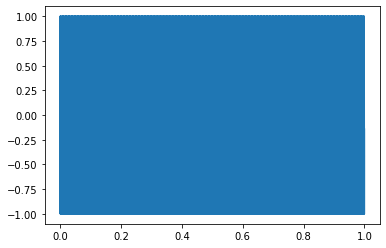

In [15]:
plt.plot(t, signal)
plt.show()

### Tugas Praktikum No. B 2

In [20]:
sr = 44100
freq = 200
length = 16
t2 = np.arange(0, length, 1.0/sr)
signal2 = np.sin(np.pi*2*freq*t)

write("file3.wav", sr, signal2)

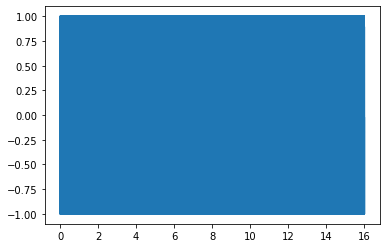

In [21]:
plt.plot(t2, signal2)
plt.show()

<hr>

# Text Mining

## Tugas Praktikum:
<ol>
    <li> Modifikasi kode bagian (a) agar bisa menapilkan ASCII code untuk kata `datA mining` </li>
    <li> Tambahkan kode bagian (b) agar bisa menampilkan kembali kata pertama yang di lakukan one-hot encoding (hint: lakukan inverse dari hasil encode). [[<b>1</b>000][0001][0100][0010]]  dengan bold adalah kata "I"</li>
    <li> Download file tugas_text_representation.csv dari hebat, kemudian lakukan CountVectorizer dan TF-IDF pada korpus tersebut. Jelaskan hasil yang didapatkan.
    <li> Modifikasi kode bagian (d) agar bisa menampilkan grafik dari tiap kata. </li>
</ol>
<hr>

### Tugas Praktikum No. C 1

In [24]:
_char = 'datA mining'
_ascii = [ord(letter) for letter in _char]
print(_ascii)

[100, 97, 116, 65, 32, 109, 105, 110, 105, 110, 103]


### Tugas Praktikum No. C 2